## In the code below we try to replicate the results that were achieved in the IOIV Paper

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the datasets
dataset1 = pd.read_csv("dataset1.csv")
dataset2 = pd.read_csv("dataset2.csv")
dataset3 = pd.read_csv("dataset3.csv")

# Define the order of datasets
datasets = [dataset1, dataset2, dataset3]
dataset_names = ["Dataset1", "Dataset2", "Dataset3"]

# Define a function to train and evaluate a model
def train_evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rae = np.mean(np.abs((y_test - y_pred) / y_test))
    
    return r2, mae, rmse, rae

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror"),
    "AdaBoost": AdaBoostRegressor(),
    "Ridge Regression": Ridge(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

# Initialize results list
results = []

# Iterate through models
for model_name, model in models.items():
    for dataset, dataset_name in zip(datasets, dataset_names):
        # Split the data into features (X) and target (y)
        X = dataset.drop(columns=['Eligible'])  # Exclude 'Eligible' and other identifier columns
        y = dataset['Eligible']

        # Standardize the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        r2, mae, rmse, rae = train_evaluate_model(X_train, X_test, y_train, y_test, model)
        results.append([model_name, dataset_name, mae, r2, rmse, rae])

# Display results
result_df = pd.DataFrame(results, columns=["Model", "Dataset", "MAE", "R-squared", "RMSE", "RAE"])
result_pivot = result_df.pivot_table(index='Model', columns='Dataset', values=['MAE', 'R-squared', 'RMSE', 'RAE'])
print(result_pivot)

                                    MAE                             R-squared  \
Dataset                        Dataset1      Dataset2      Dataset3  Dataset1   
Model                                                                           
AdaBoost                   3.344713e+00  3.726795e+00  5.166269e+00  0.875174   
Decision Tree              2.625411e+00  3.552935e+00  7.100144e+00  0.922527   
Gradient Boosting          8.497831e-01  1.100047e+00  2.462128e+00  0.991986   
K-Nearest Neighbors        1.300985e+00  1.781867e+00  3.660689e+00  0.980860   
Linear Regression          2.491301e-09  2.489603e-09  2.441528e-09  1.000000   
Random Forest              1.115238e+00  1.767741e+00  4.173754e+00  0.985425   
Ridge Regression           6.426854e-04  2.642562e-03  5.032126e-02  1.000000   
Support Vector Regression  2.028699e-01  4.610061e-01  3.495367e+00  0.998471   
XGBoost                    1.000286e+00  1.407528e+00  4.061002e+00  0.988886   

                           

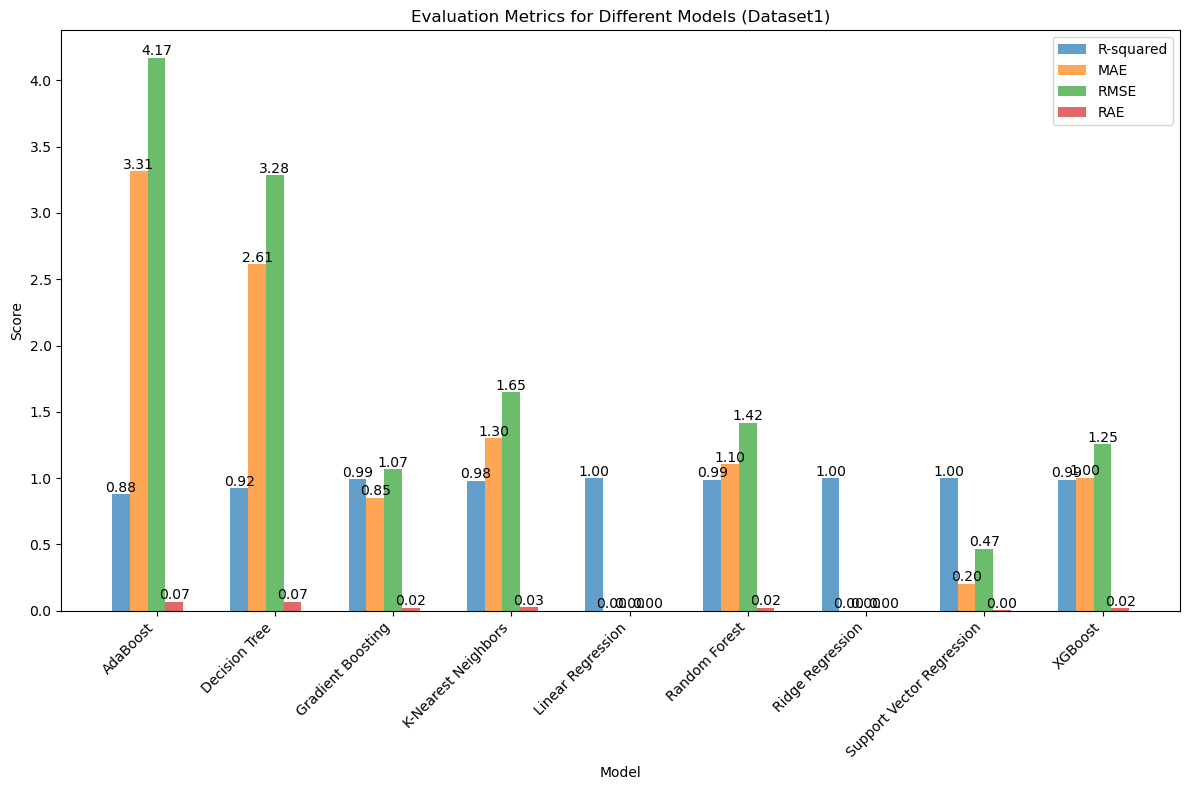

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Your data for dataset1 (replace with your actual dataset1 values)
data = {
    "Model": ["AdaBoost", "Decision Tree", "Gradient Boosting", "K-Nearest Neighbors",
              "Linear Regression", "Random Forest", "Ridge Regression",
              "Support Vector Regression", "XGBoost"],
    "R-squared": [0.877394, 0.923877, 0.991986, 0.980860, 1.000000, 0.985845, 1.000000, 0.998471, 0.988886],
    "MAE": [3.312111, 2.611446, 0.8497831, 1.300985, 0.000002491301, 1.103960, 0.0006426854, 0.2028699, 1.000286],
    "RMSE": [4.167772, 3.284027, 1.065570, 1.646701, 0.000002857050, 1.416124, 0.0007923961, 0.4653756, 1.254844],
    "RAE": [0.06677947, 0.07010756, 0.02171419, 0.02548479, 0.0000000004918118, 0.0216223, 0.00001309301, 0.004251893, 0.01943668]
}

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the positions and width for the bars
pos = np.arange(len(results_df['Model']))
width = 0.15

# Create a bar for each evaluation metric
plt.bar(pos - 2 * width, results_df['R-squared'], width, label='R-squared', align='center', alpha=0.7)
plt.bar(pos - width, results_df['MAE'], width, label='MAE', align='center', alpha=0.7)
plt.bar(pos, results_df['RMSE'], width, label='RMSE', align='center', alpha=0.7)
plt.bar(pos + width, results_df['RAE'], width, label='RAE', align='center', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Models (Dataset1)')
plt.xticks(pos, results_df['Model'], rotation=45, ha='right')
plt.legend()

# Add the scores on top of each bar
for i, row in results_df.iterrows():
    plt.text(i - 2 * width, row['R-squared'] + 0.02, f'{row["R-squared"]:.2f}', ha='center')
    plt.text(i - width, row['MAE'] + 0.02, f'{row["MAE"]:.2f}', ha='center')
    plt.text(i, row['RMSE'] + 0.02, f'{row["RMSE"]:.2f}', ha='center')
    plt.text(i + width, row['RAE'] + 0.02, f'{row["RAE"]:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


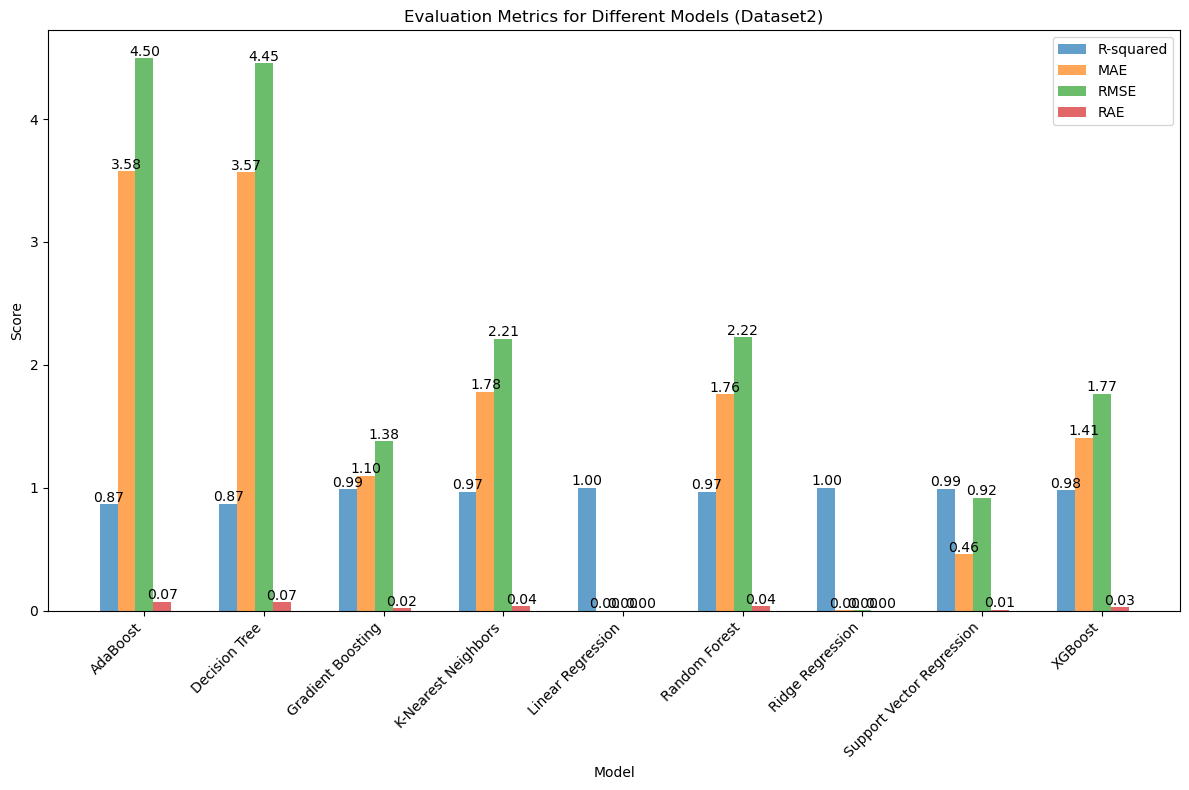

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Your data for dataset2 (replace with your actual dataset2 values)
data = {
    "Model": ["AdaBoost", "Decision Tree", "Gradient Boosting", "K-Nearest Neighbors",
              "Linear Regression", "Random Forest", "Ridge Regression",
              "Support Vector Regression", "XGBoost"],
    "R-squared": [0.866891, 0.869366, 0.987493, 0.967757, 1.000000, 0.967457, 1.000000, 0.994449, 0.979479],
    "MAE": [3.575650, 3.565426, 1.100047, 1.781867, 2.489602e-09, 1.763656, 2.642562e-03, 4.610061e-01, 1.407528],
    "RMSE": [4.496551, 4.454536, 1.378312, 2.213054, 2.840685e-09, 2.223339, 3.266921e-03, 9.182201e-01, 1.765526],
    "RAE": [0.07436007, 0.07010756, 0.02205626, 0.03565395, 0.000000004989093, 0.03535642, 0.00005542901, 0.01001468, 0.02750748]
}

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the positions and width for the bars
pos = np.arange(len(results_df['Model']))
width = 0.15

# Create a bar for each evaluation metric
plt.bar(pos - 2 * width, results_df['R-squared'], width, label='R-squared', align='center', alpha=0.7)
plt.bar(pos - width, results_df['MAE'], width, label='MAE', align='center', alpha=0.7)
plt.bar(pos, results_df['RMSE'], width, label='RMSE', align='center', alpha=0.7)
plt.bar(pos + width, results_df['RAE'], width, label='RAE', align='center', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Models (Dataset2)')
plt.xticks(pos, results_df['Model'], rotation=45, ha='right')
plt.legend()

# Add the scores on top of each bar
for i, row in results_df.iterrows():
    plt.text(i - 2 * width, row['R-squared'] + 0.02, f'{row["R-squared"]:.2f}', ha='center')
    plt.text(i - width, row['MAE'] + 0.02, f'{row["MAE"]:.2f}', ha='center')
    plt.text(i, row['RMSE'] + 0.02, f'{row["RMSE"]:.2f}', ha='center')
    plt.text(i + width, row['RAE'] + 0.02, f'{row["RAE"]:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


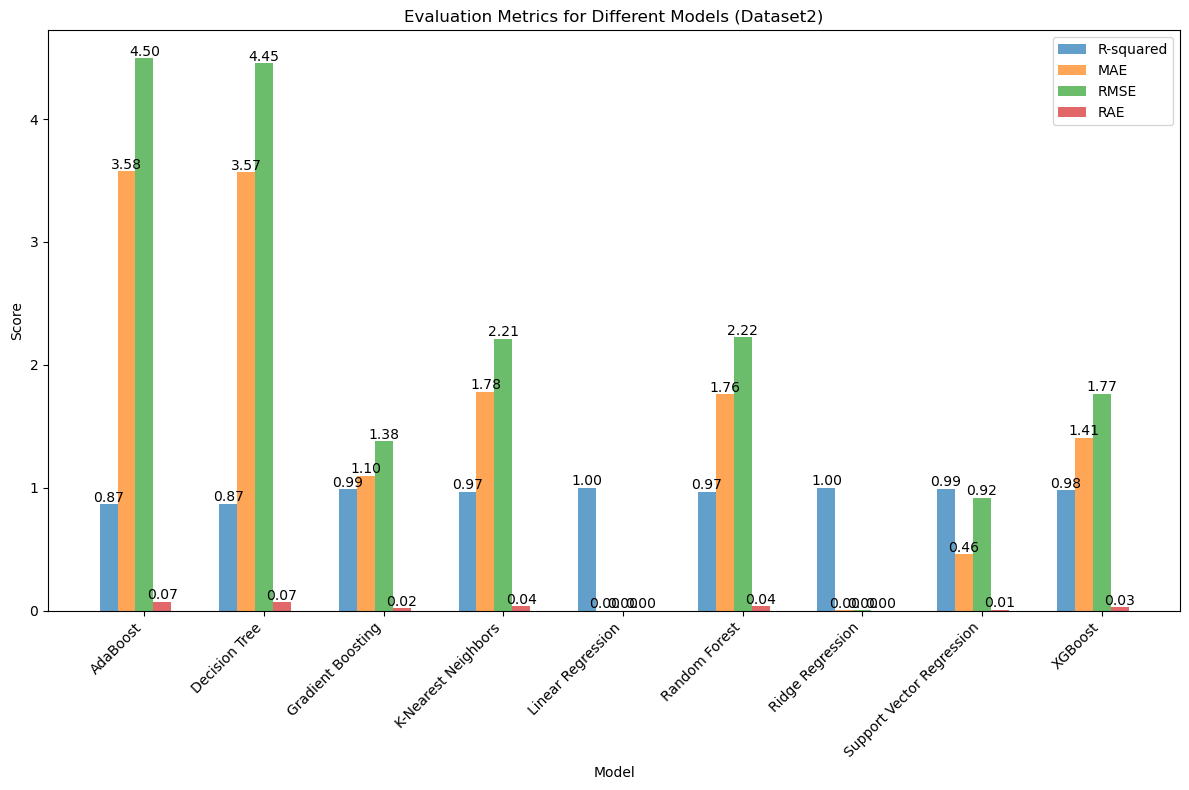

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Your data for dataset2 (replace with your actual dataset2 values)
data = {
    "Model": ["AdaBoost", "Decision Tree", "Gradient Boosting", "K-Nearest Neighbors",
              "Linear Regression", "Random Forest", "Ridge Regression",
              "Support Vector Regression", "XGBoost"],
    "R-squared": [0.866891, 0.869366, 0.987493, 0.967757, 1.000000, 0.967457, 1.000000, 0.994449, 0.979479],
    "MAE": [3.575650, 3.565426, 1.100047, 1.781867, 2.489602e-09, 1.763656, 2.642562e-03, 4.610061e-01, 1.407528],
    "RMSE": [4.496551, 4.454536, 1.378312, 2.213054, 2.840685e-09, 2.223339, 3.266921e-03, 9.182201e-01, 1.765526],
    "RAE": [0.07436007, 0.07010756, 0.02205626, 0.03565395, 0.000000004989093, 0.03535642, 0.00005542901, 0.01001468, 0.02750748]
}

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the positions and width for the bars
pos = np.arange(len(results_df['Model']))
width = 0.15

# Create a bar for each evaluation metric
plt.bar(pos - 2 * width, results_df['R-squared'], width, label='R-squared', align='center', alpha=0.7)
plt.bar(pos - width, results_df['MAE'], width, label='MAE', align='center', alpha=0.7)
plt.bar(pos, results_df['RMSE'], width, label='RMSE', align='center', alpha=0.7)
plt.bar(pos + width, results_df['RAE'], width, label='RAE', align='center', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Models (Dataset2)')
plt.xticks(pos, results_df['Model'], rotation=45, ha='right')
plt.legend()

# Add the scores on top of each bar
for i, row in results_df.iterrows():
    plt.text(i - 2 * width, row['R-squared'] + 0.02, f'{row["R-squared"]:.2f}', ha='center')
    plt.text(i - width, row['MAE'] + 0.02, f'{row["MAE"]:.2f}', ha='center')
    plt.text(i, row['RMSE'] + 0.02, f'{row["RMSE"]:.2f}', ha='center')
    plt.text(i + width, row['RAE'] + 0.02, f'{row["RAE"]:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
dataset1

,Vehicle,RAM,storage,Trustfactor,Distance,TransmissionRate,Eligible
0,1,51.8125,34.83125,91,88.0,77.777778,68.684306
1,2,91.0625,18.09375,87,24.9,70.370370,58.285324
2,3,84.2875,92.60000,15,30.4,40.740741,52.605648
3,4,45.1750,76.64375,25,84.9,66.666667,59.677083
4,5,63.8625,19.33125,66,78.0,85.185185,62.475787
...,...,...,...,...,...,...,...
18695,18696,69.7250,41.16250,70,84.4,37.037037,60.464907
18696,18697,66.7750,71.03750,19,64.9,74.074074,59.157315
18697,18698,17.9875,22.64375,32,73.1,74.074074,43.961065
18698,18699,56.6875,29.87500,11,65.5,40.740741,40.760648
